In [1]:
import threading
from PIL import Image
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display

In [2]:
target_width = 200
target_height = 300

In [3]:
def convert_image_to_tuple(image_path):
    # Load the image
    image = Image.open(image_path).convert("RGB").convert("L")
    resized_image = image.resize(
        (target_width, target_height), Image.Resampling.LANCZOS
    )
    array = np.array(resized_image).flatten()
    return array

def convert_tuple_to_image(image_tuple, target_width, target_height):
    array = np.array(image_tuple, dtype=np.uint8)
    reshaped_array = array.reshape(target_height, target_width)
    image = Image.fromarray(reshaped_array, mode="L")
    return image

In [4]:
input_tuple = convert_image_to_tuple('Test_internet/Captura de pantalla 2023-09-19 163708.png')
len(input_tuple)
print(input_tuple)

[254 254 255 ...  99  94 131]


In [5]:
array_length = len(input_tuple)
random_integers = np.random.randint(0, 254, size=array_length)

mask=np.full(array_length,random_integers)



In [6]:
mask

array([ 44, 117,  43, ..., 200,  52,  53])

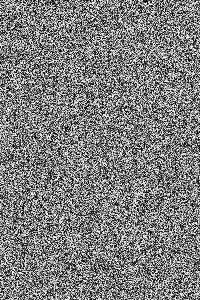

In [7]:
convert_tuple_to_image(mask, target_width, target_height)

In [8]:
e = np.linalg.norm(input_tuple - mask)
print(e)

27545.824547469983


In [18]:
def sequence(a, b, rate):
    e = np.linalg.norm(a - b)
    xn = np.copy(b)
    count = 0
    while e > 1:
        xn = xn + ((a-xn)*rate)
        e = np.linalg.norm(a - xn)
        z = convert_tuple_to_image(xn, 200, 300)
        count += 1
        print(f"iteración numero: {count}, distancia: {e}")
        display(z)  


iteración numero: 1, distancia: 13772.912273734992


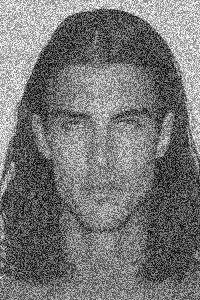

iteración numero: 2, distancia: 6886.456136867496


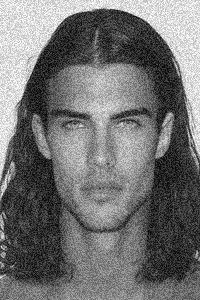

iteración numero: 3, distancia: 3443.228068433748


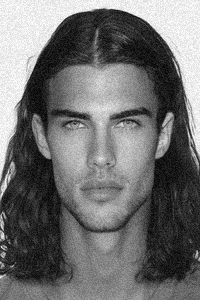

iteración numero: 4, distancia: 1721.614034216874


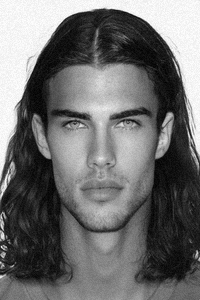

iteración numero: 5, distancia: 860.807017108437


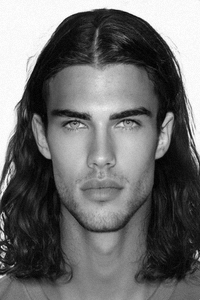

iteración numero: 6, distancia: 430.4035085542185


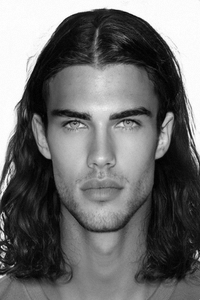

iteración numero: 7, distancia: 215.20175427710925


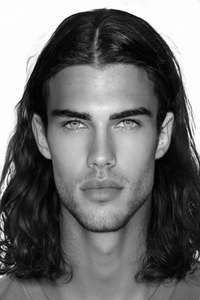

iteración numero: 8, distancia: 107.60087713855462


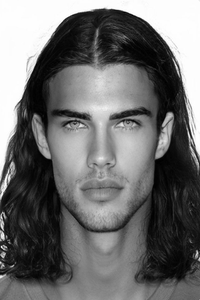

iteración numero: 9, distancia: 53.80043856927731


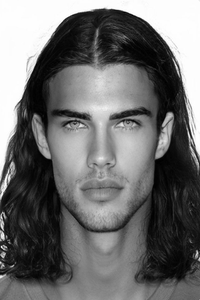

iteración numero: 10, distancia: 26.900219284638656


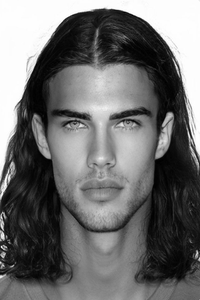

iteración numero: 11, distancia: 13.450109642319328


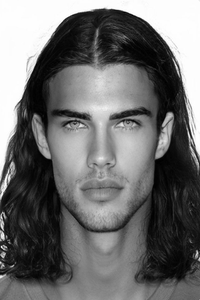

iteración numero: 12, distancia: 6.725054821159664


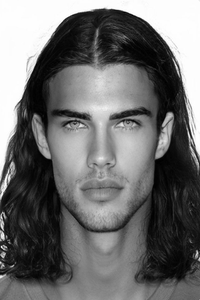

iteración numero: 13, distancia: 3.362527410579832


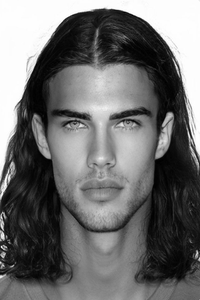

iteración numero: 14, distancia: 1.681263705289916


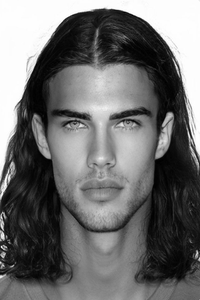

iteración numero: 15, distancia: 0.840631852644958


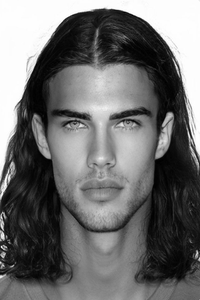

In [19]:
sequence(input_tuple, mask, 0.5)